
Analyzing pitch_deck_1.pdf...
Section Scores:
Problem: 0.62
Solution: 0.61
Market: 0.60
Business Model: 0.58
Financials: 0.59
Team: 0.57

Feedback:
Problem: Needs Improvement - This section lacks clarity or detail.
Solution: Needs Improvement - This section lacks clarity or detail.
Market: Needs Improvement - This section lacks clarity or detail.
Business Model: Needs Improvement - This section lacks clarity or detail.
Financials: Needs Improvement - This section lacks clarity or detail.
Team: Needs Improvement - This section lacks clarity or detail.


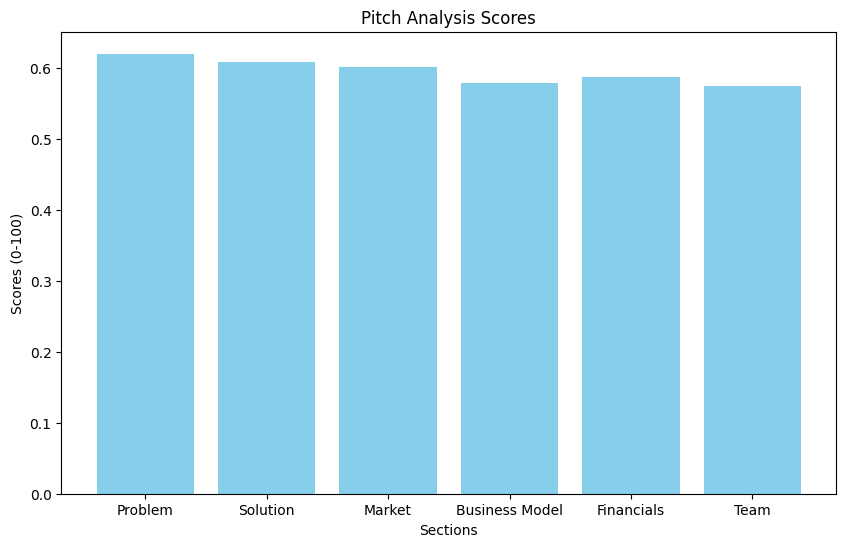


Analyzing pitch_deck_2.pdf...
Section Scores:
Problem: 0.64
Solution: 0.62
Market: 0.59
Business Model: 0.58
Financials: 0.58
Team: 0.57

Feedback:
Problem: Needs Improvement - This section lacks clarity or detail.
Solution: Needs Improvement - This section lacks clarity or detail.
Market: Needs Improvement - This section lacks clarity or detail.
Business Model: Needs Improvement - This section lacks clarity or detail.
Financials: Needs Improvement - This section lacks clarity or detail.
Team: Needs Improvement - This section lacks clarity or detail.


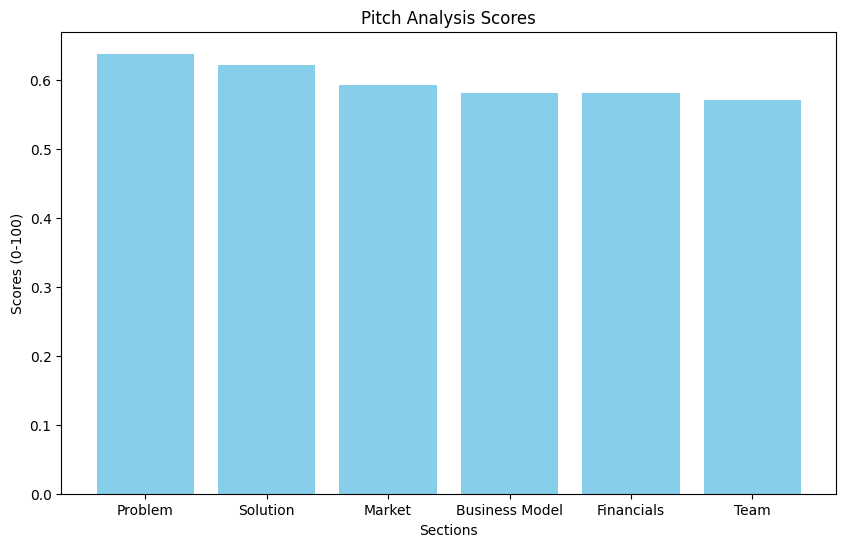


Analyzing pitch_deck_3.pdf...
Section Scores:
Problem: 0.62
Solution: 0.60
Market: 0.59
Business Model: 0.58
Financials: 0.57
Team: 0.56

Feedback:
Problem: Needs Improvement - This section lacks clarity or detail.
Solution: Needs Improvement - This section lacks clarity or detail.
Market: Needs Improvement - This section lacks clarity or detail.
Business Model: Needs Improvement - This section lacks clarity or detail.
Financials: Needs Improvement - This section lacks clarity or detail.
Team: Needs Improvement - This section lacks clarity or detail.


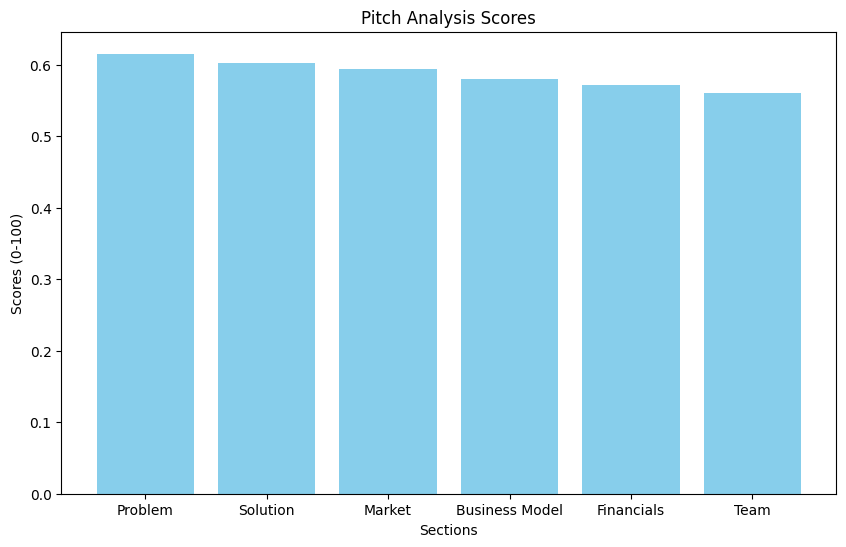

In [2]:
import os
import PyPDF2  # For PDF parsing
import torch
from transformers import BertTokenizer, BertForSequenceClassification
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import json

# Load fine-tuned BERT model and tokenizer
model_path = './fine_tuned_bert'
tokenizer = BertTokenizer.from_pretrained(model_path)
model = BertForSequenceClassification.from_pretrained(model_path)

scaler = MinMaxScaler(feature_range=(0, 100))


def extract_text_from_pdf(pdf_path):
    text = ""
    with open(pdf_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)  # Updated to PdfReader
        for page_num in range(len(reader.pages)):  # Updated to access pages via indexing
            page = reader.pages[page_num]
            text += page.extract_text() + " "
    return text


def preprocess_text(text):
    text = text.replace('\n', ' ').strip()
    return text


def get_section_score(text):
    inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=512)
    outputs = model(**inputs)
    scores = torch.softmax(outputs.logits, dim=1).detach().numpy().flatten()
    score = scores[1] * 100  # Assuming label 1 corresponds to positive sentiment
    return score


def analyze_pitch(text):
    sections = {
        'Problem': '', 'Solution': '', 'Market': '', 'Business Model': '', 'Financials': '', 'Team': ''
    }

    for section in sections.keys():
        start_idx = text.find(section + ':')
        if start_idx != -1:
            end_idx = text.find('\n', start_idx)
            sections[section] = text[start_idx:end_idx].strip() if end_idx != -1 else text[start_idx:].strip()

    results = {}
    for section, content in sections.items():
        if content:
            score = get_section_score(content)
            results[section] = score

    return results


def generate_feedback(scores):
    feedback = {}
    for section, score in scores.items():
        if score >= 80:
            feedback[section] = 'Excellent - This section is well-crafted and provides relevant information.'
        elif score >= 60:
            feedback[section] = 'Good - This section is decent but could use some improvements.'
        else:
            feedback[section] = 'Needs Improvement - This section lacks clarity or detail.'
    return feedback


def plot_scores(scores):
    plt.figure(figsize=(10, 6))
    sections = list(scores.keys())
    values = list(scores.values())
    plt.bar(sections, values, color='skyblue')
    plt.title('Pitch Analysis Scores')
    plt.xlabel('Sections')
    plt.ylabel('Scores (0-100)')
    plt.show()


def save_results(scores, feedback, output_file='pitch_analysis_results.json'):
    results = {'scores': scores, 'feedback': feedback}
    with open(output_file, 'w') as f:
        json.dump(results, f, indent=4)


def main(pdf_path):
    raw_text = extract_text_from_pdf(pdf_path)
    processed_text = preprocess_text(raw_text)
    scores = analyze_pitch(processed_text)
    feedback = generate_feedback(scores)

    print('Section Scores:')
    for section, score in scores.items():
        print(f'{section}: {score:.2f}')

    print('\nFeedback:')
    for section, comment in feedback.items():
        print(f'{section}: {comment}')

    plot_scores(scores)
    save_results(scores, feedback)


# Run analysis on multiple pitch decks
for pdf_file in ['pitch_deck_1.pdf', 'pitch_deck_2.pdf', 'pitch_deck_3.pdf']:
    print(f"\nAnalyzing {pdf_file}...")
    main(pdf_file)
